<a href="https://www.kaggle.com/code/mansibmursalin/date-classification-let-s-vote-acc-95?scriptVersionId=97428783" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
! pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 1.5 MB/s eta 0:00:00


In [2]:
# All the imports needed

# Data Manipulation
import numpy as np
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Train Test Split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#File Directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.arff


In [3]:
#Reading the file
dates = pd.read_excel('/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

In [4]:
#Groupby based on each class
datesgp = dates.groupby(by='Class').mean()
datesgp

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
Class,,,,,,,,,,,,,,,,,,,,,
BERHI,405213.446154,2321.504669,815.370329,634.656000,0.621369,716.904234,0.993957,407666.153846,0.766549,1.288515,...,1.237302,3.805326,5.732585,6.671926,-4.139439e+10,-3.796279e+10,-3.325089e+10,49.352677,48.263368,44.324366
DEGLET,233743.357143,1831.441983,680.222427,440.273151,0.756589,543.476547,0.984319,237428.908163,0.760827,1.550036,...,-0.222301,2.644296,2.642760,2.742700,-3.555533e+10,-3.061273e+10,-2.876142e+10,59.580324,55.605459,54.638908
DOKOL,145147.421569,1436.321190,537.843773,342.949578,0.763276,427.546873,0.987206,147026.990196,0.755143,1.565859,...,-0.142743,3.070927,3.051433,2.751065,-2.370817e+10,-2.213381e+10,-1.897899e+10,61.817167,60.260382,56.393073
IRAQI,433983.583333,2411.046333,836.104518,664.326222,0.595040,742.701772,0.993076,436990.513889,0.763890,1.261814,...,1.072739,5.975487,7.677246,6.215456,-2.909566e+10,-3.064288e+10,-3.057680e+10,40.237440,41.758233,41.056210
ROTANA,387115.867470,2376.310050,832.475543,599.880924,0.686942,701.009730,0.980255,394846.084337,0.736674,1.391999,...,-0.172949,2.763720,2.769380,2.903195,-6.212994e+10,-5.455981e+10,-5.089050e+10,61.717520,58.280622,56.329015
SAFAVI,334367.783920,2329.186030,881.385573,488.488877,0.826394,650.104639,0.973426,343399.924623,0.686883,4.483646,...,0.626492,7.819265,10.384683,4.684819,-9.085305e+09,-1.099945e+10,-1.459300e+10,25.676704,29.007776,33.765713
SOGAY,286872.957447,2051.277354,755.978483,492.676919,0.751864,602.329610,0.971239,295203.734043,0.731430,1.536905,...,0.236660,2.516620,2.728207,2.871002,-3.588859e+10,-2.791138e+10,-2.645158e+10,53.883697,47.810700,47.089709


In [5]:
#Describe the original dataset
dates.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [6]:
#Checking data types and null values
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

<AxesSubplot:>

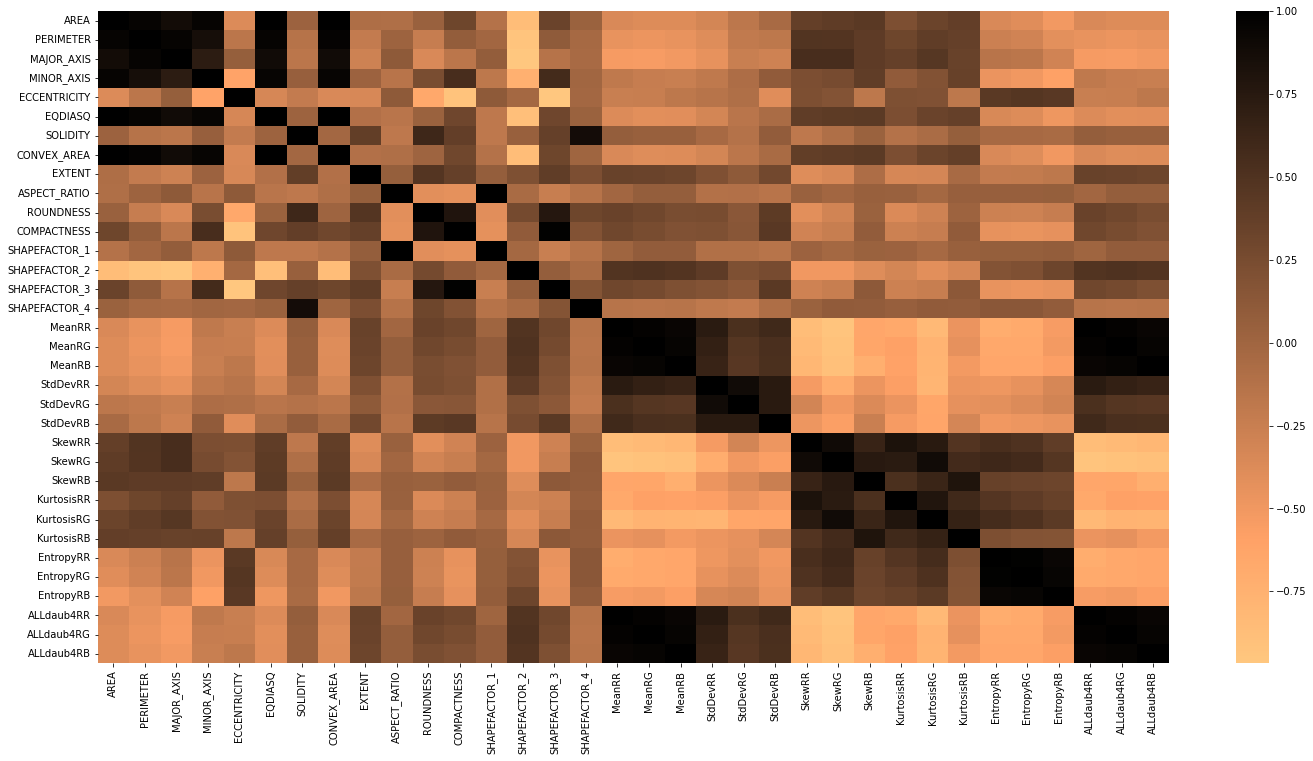

In [7]:
#Heatmap for all correlations
plt.figure(figsize=(24,12))
sns.heatmap(dates.corr(),annot=False,cmap='copper_r')

<AxesSubplot:xlabel='AREA', ylabel='PERIMETER'>

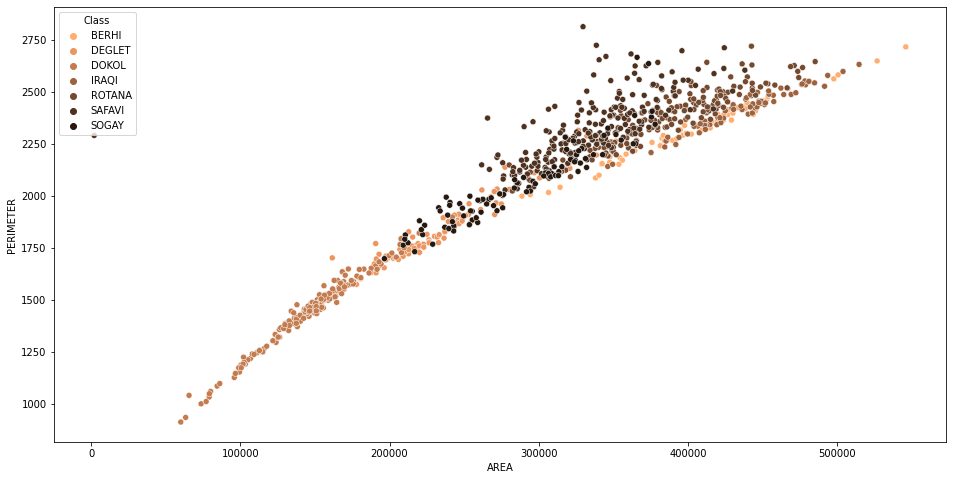

In [8]:
#Scatterplot comparing the Area and Perimeter based on each class
plt.figure(figsize=(16,8))
sns.scatterplot(x=dates['AREA'],y=dates['PERIMETER'],hue=dates['Class'],palette='copper_r',legend='auto')

<AxesSubplot:xlabel='Class', ylabel='count'>

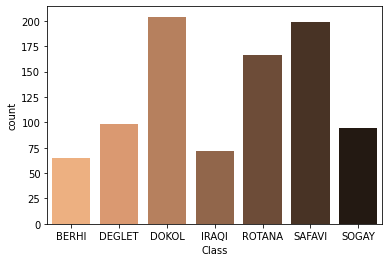

In [9]:
#Count of each class
sns.countplot(data=dates, x='Class', palette='copper_r')

<AxesSubplot:xlabel='Class', ylabel='AREA'>

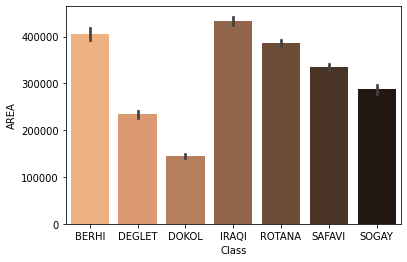

In [10]:
#Barplot for the mean of area of each class
sns.barplot(x=dates['Class'],y=dates['AREA'],palette='copper_r')

<AxesSubplot:xlabel='AREA', ylabel='Class'>

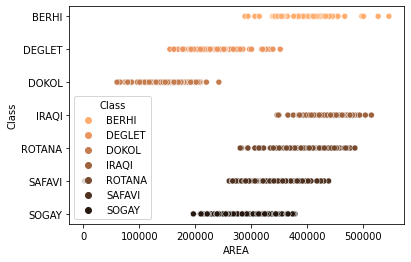

In [11]:
#Scatterplot for the area of each class
sns.scatterplot(x=dates['AREA'],y=dates['Class'],hue=dates['Class'],palette='copper_r')

<AxesSubplot:xlabel='PERIMETER', ylabel='Class'>

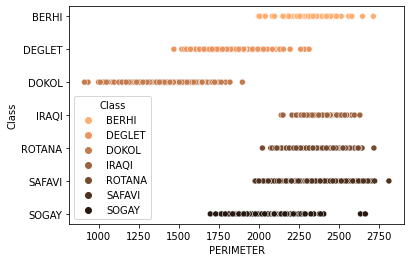

In [12]:
#Scatterplot for the perimeter of each class
sns.scatterplot(x=dates['PERIMETER'],y=dates['Class'],hue=dates['Class'],palette='copper_r')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


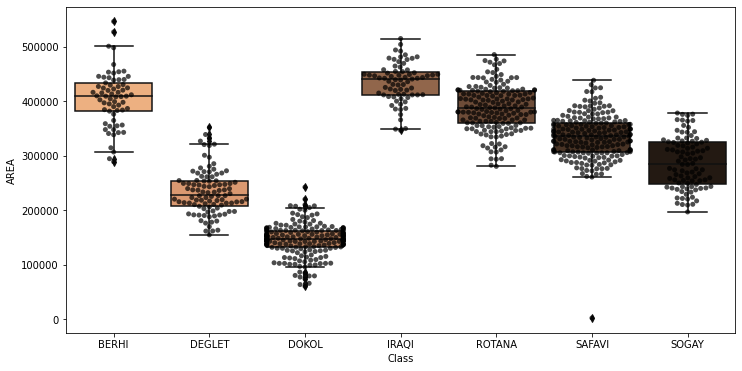

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


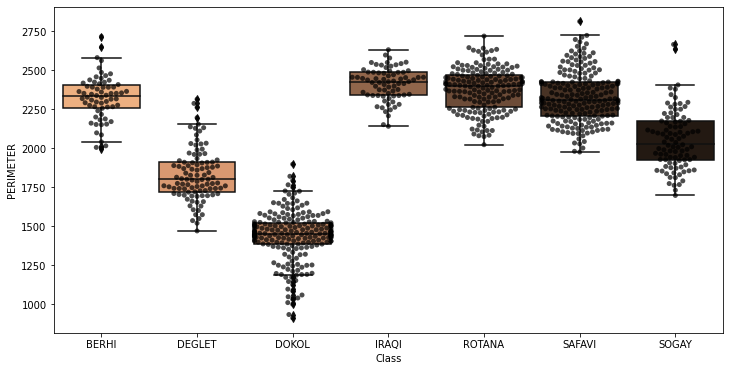

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


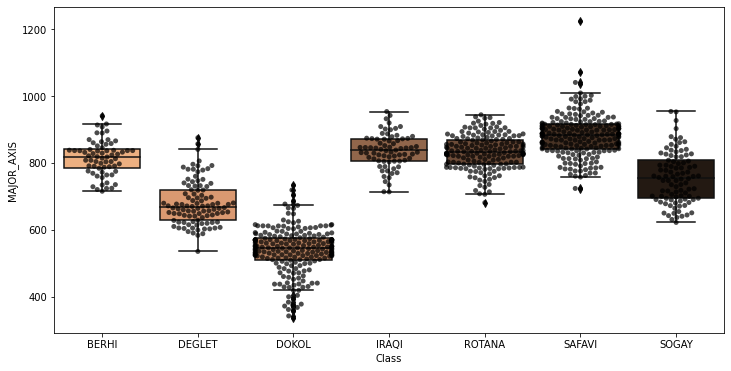

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


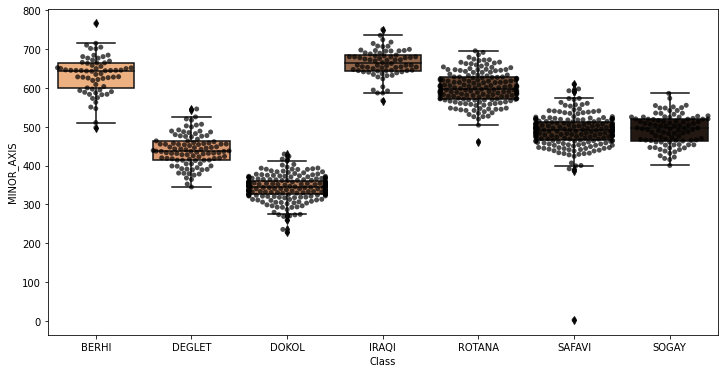

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


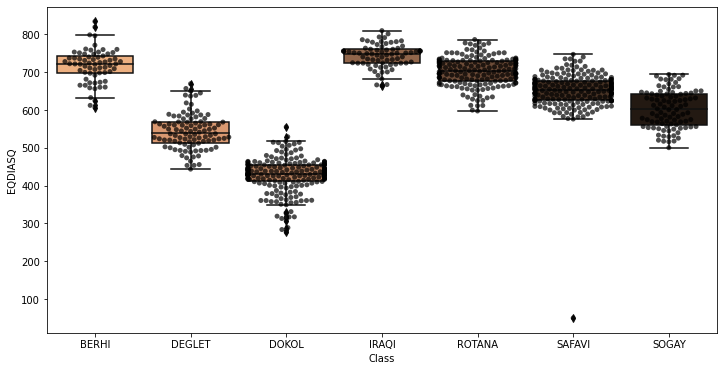

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; y

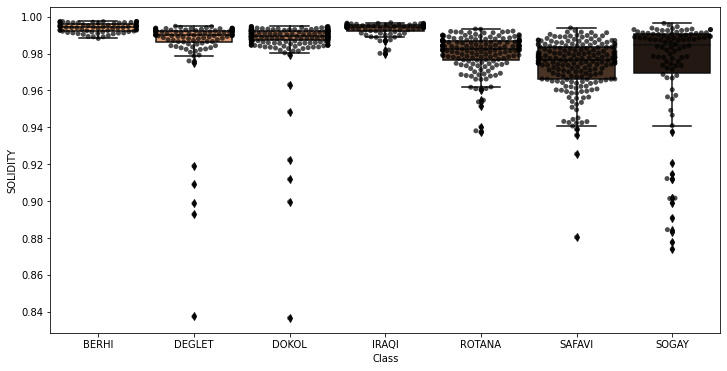

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


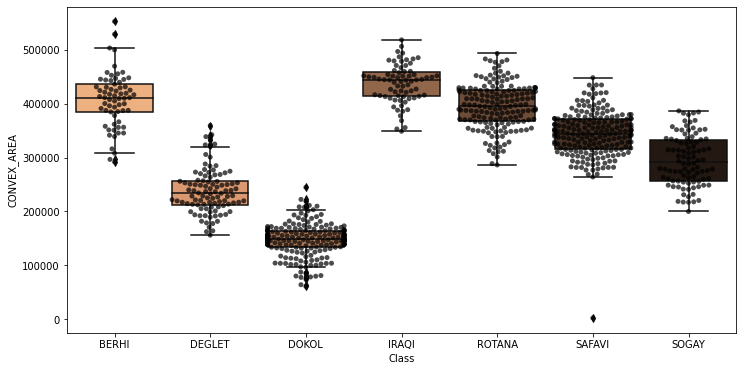

In [13]:
#Printing swarm and boxplot in one plot based on the following features
feat = ["AREA","PERIMETER","MAJOR_AXIS","MINOR_AXIS","EQDIASQ","SOLIDITY", "CONVEX_AREA"]
for feature in feat: 
    plt.figure(figsize=(12,6))
    sns.swarmplot(x=dates["Class"], y=dates[feature], color="black", alpha=0.7)
    sns.boxplot(x=dates["Class"], y=dates[feature], palette='copper_r')
    plt.show()

# Dropping outliers

In [14]:
dates = dates[dates['SOLIDITY'] > 0.93]

In [15]:
dates = dates[dates['MAJOR_AXIS'] < 1000]

# Feature Selection

In [16]:
Features = dates.drop('Class',axis=1)
Label = dates['Class']

In [17]:
#Features to drop based on feature importance figure down
todrop = ['EXTENT','COMPACTNESS','StdDevRR','EntropyRG','KurtosisRB','ECCENTRICITY','MeanRB','SkewRR',
           'ASPECT_RATIO','SOLIDITY','SHAPEFACTOR_3','SHAPEFACTOR_4','KurtosisRR']
Features.drop(todrop,axis=1,inplace=True)

In [18]:
# Scaling the data using standard scaler
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

In [19]:
#Train test split
X = scaled
y = Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

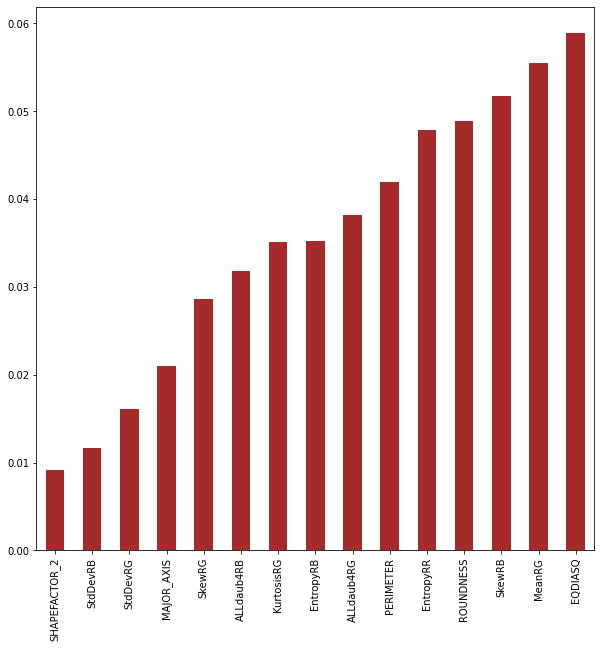

In [20]:
# Show which features has the most effect on our results so we can modify and tune our features
# I used Random Forest Classifier to determine the feature importances

plt.figure(figsize=(10,10))
rfc = RandomForestClassifier(n_estimators=70,max_features='auto', max_depth=8, n_jobs=-1)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)
importance = pd.Series(rfc.feature_importances_,index=Features.columns)
importance.nsmallest(15).plot(kind='bar',color='brown')
plt.show()

# Training Models

### KNN

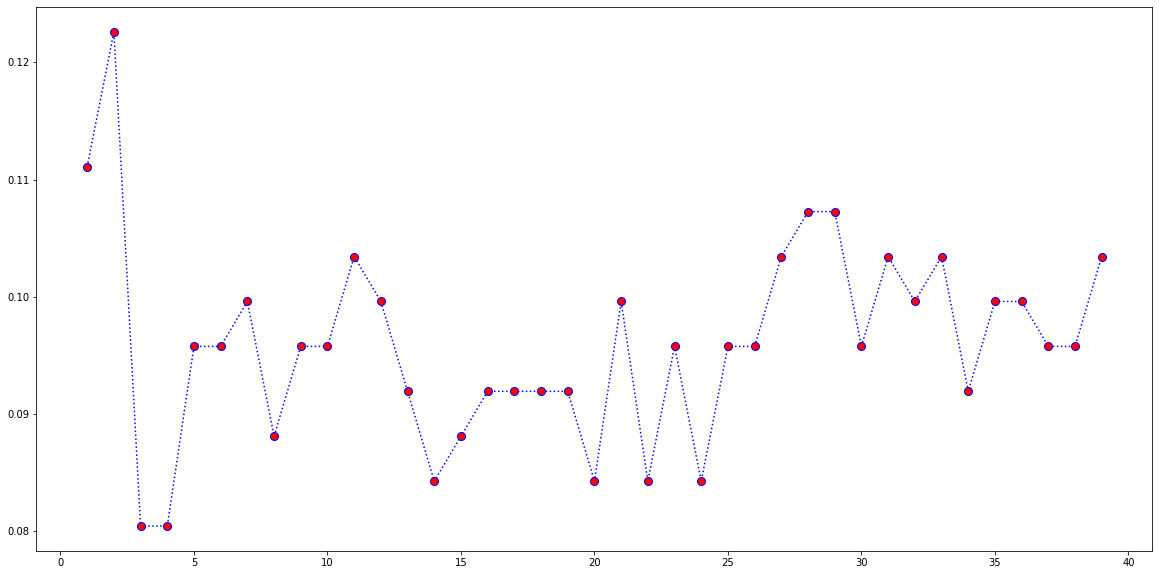

In [21]:
err_rate = [] # Array to save all error rates

for i in range(1,40): # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array
    
    # Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel = 'K Value' #x label
plt.ylabel= 'Error Rate' # y label
plt.show()

KNN Classifier

              precision    recall  f1-score   support

       BERHI       0.84      0.94      0.89        17
      DEGLET       0.72      0.78      0.75        27
       DOKOL       0.97      1.00      0.98        59
       IRAQI       0.95      0.87      0.91        23
      ROTANA       0.91      0.98      0.95        54
      SAFAVI       1.00      1.00      1.00        56
       SOGAY       0.88      0.60      0.71        25

    accuracy                           0.92       261
   macro avg       0.90      0.88      0.88       261
weighted avg       0.92      0.92      0.92       261



<AxesSubplot:>

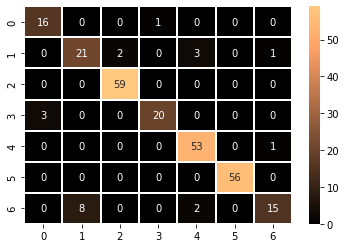

In [22]:
knn = KNeighborsClassifier(n_neighbors=4,p=2,n_jobs=-1)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
print('KNN Classifier' + '\n')
print(classification_report(y_test,knnpred))
sns.heatmap(confusion_matrix(y_test,knnpred),cmap='copper',annot=True,linewidths=2,linecolor='white')

### SVC

Support Vector Classifier

              precision    recall  f1-score   support

       BERHI       1.00      0.94      0.97        17
      DEGLET       0.79      0.85      0.82        27
       DOKOL       0.98      1.00      0.99        59
       IRAQI       0.96      0.96      0.96        23
      ROTANA       0.98      1.00      0.99        54
      SAFAVI       1.00      0.98      0.99        56
       SOGAY       0.83      0.76      0.79        25

    accuracy                           0.95       261
   macro avg       0.93      0.93      0.93       261
weighted avg       0.95      0.95      0.95       261



<AxesSubplot:>

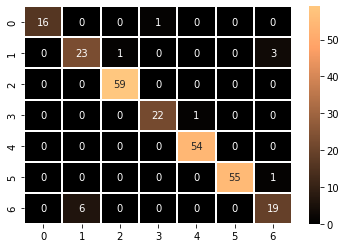

In [23]:
sup = SVC(C=10,gamma='auto',kernel='rbf')
sup.fit(X_train,y_train)
svcpred = sup.predict(X_test)
print('Support Vector Classifier' + '\n')
print(classification_report(y_test,svcpred))
sns.heatmap(confusion_matrix(y_test,svcpred),cmap='copper',annot=True,linewidths=2,linecolor='white')

### Logistic regression

Logistic Regression

              precision    recall  f1-score   support

       BERHI       1.00      0.94      0.97        17
      DEGLET       0.88      0.78      0.82        27
       DOKOL       0.97      1.00      0.98        59
       IRAQI       0.96      0.96      0.96        23
      ROTANA       0.98      1.00      0.99        54
      SAFAVI       0.98      1.00      0.99        56
       SOGAY       0.84      0.84      0.84        25

    accuracy                           0.95       261
   macro avg       0.94      0.93      0.94       261
weighted avg       0.95      0.95      0.95       261



<AxesSubplot:>

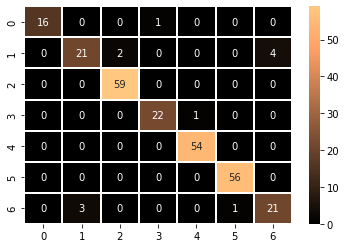

In [24]:
logr = LogisticRegression(C=1,max_iter=150,multi_class='auto')
logr.fit(X_train,y_train)
logpred = logr.predict(X_test)
print('Logistic Regression' + '\n')
print(classification_report(y_test,logpred))
sns.heatmap(confusion_matrix(y_test,logpred),cmap='copper',annot=True,linewidths=2,linecolor='white')

### Random forest classifier

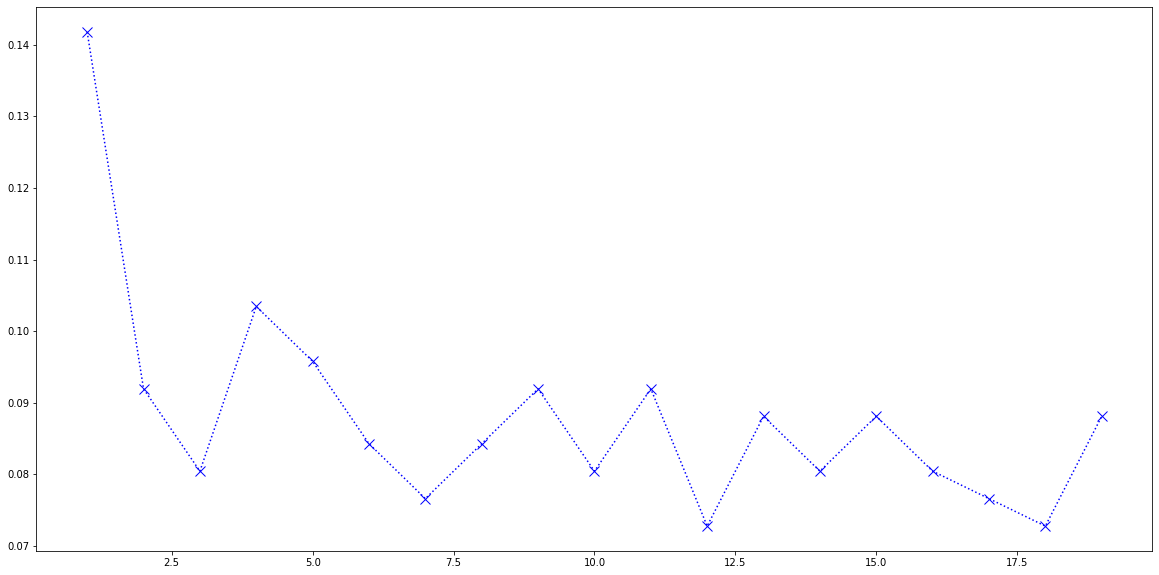

In [25]:
err = [] # Array to save all error rates

for i in range(1,20): # Loop to try all error rates from 1 to 20
    rfe = RandomForestClassifier(n_estimators=i*10) # Create rfc with number of estimators with value i*10
    rfe.fit(X_train,y_train) # Fit the model
    errpred = rfe.predict(X_test) # Predict the value
    err.append(np.mean(errpred != y_test)) #Add the value to the array
    
    
# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='x',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

Random Forest

              precision    recall  f1-score   support

       BERHI       0.76      0.76      0.76        17
      DEGLET       0.75      0.78      0.76        27
       DOKOL       0.97      0.98      0.97        59
       IRAQI       0.86      0.78      0.82        23
      ROTANA       1.00      0.98      0.99        54
      SAFAVI       0.98      0.96      0.97        56
       SOGAY       0.70      0.76      0.73        25

    accuracy                           0.90       261
   macro avg       0.86      0.86      0.86       261
weighted avg       0.91      0.90      0.90       261



<AxesSubplot:>

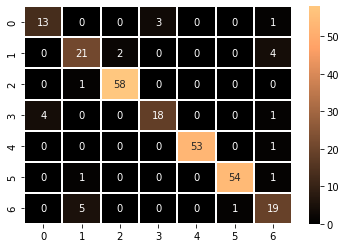

In [26]:
rfc = RandomForestClassifier(n_estimators=70,max_features='auto',max_depth=8)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)
print('Random Forest' + '\n')
print(classification_report(y_test,rfcpred))
sns.heatmap(confusion_matrix(y_test,rfcpred),cmap='copper',annot=True,linewidths=2,linecolor='white')

# Gradient Boosting Classifier

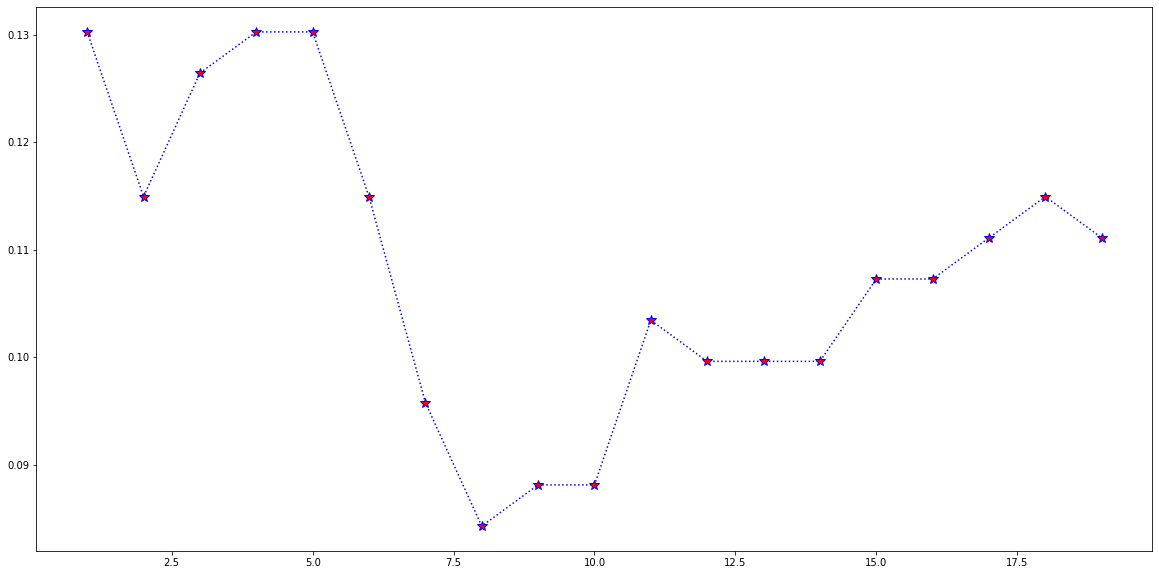

In [27]:
err = [] # Array to save all error rates

for i in range(1,20): # Loop to try all error rates from 1 to 20
    clf = GradientBoostingClassifier(n_estimators=i*10, learning_rate=1.0,max_depth=1)
    clf.fit(X_train,y_train)
    errpred = clf.predict(X_test)
    err.append(np.mean(errpred != y_test)) #Add the value to the array
    
    
# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='*',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

In [28]:
GBC = GradientBoostingClassifier(n_estimators=80, learning_rate=1.0,max_depth=1)
GBC.fit(X_train,y_train)
GBCpred = clf.predict(X_test)

Gradient Boosting

              precision    recall  f1-score   support

       BERHI       0.93      0.82      0.87        17
      DEGLET       0.62      0.74      0.68        27
       DOKOL       0.95      0.95      0.95        59
       IRAQI       0.86      0.83      0.84        23
      ROTANA       0.95      0.98      0.96        54
      SAFAVI       1.00      0.98      0.99        56
       SOGAY       0.68      0.60      0.64        25

    accuracy                           0.89       261
   macro avg       0.86      0.84      0.85       261
weighted avg       0.89      0.89      0.89       261



<AxesSubplot:>

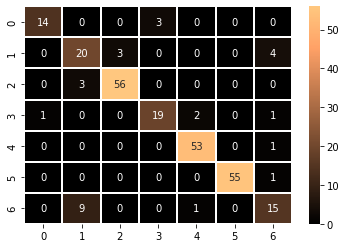

In [29]:
print('Gradient Boosting' + '\n')
print(classification_report(y_test,GBCpred))
sns.heatmap(confusion_matrix(y_test,GBCpred),cmap='copper',annot=True,linewidths=2,linecolor='white')

# Decision Tree Classifier


Decision Tree Classifier

              precision    recall  f1-score   support

       BERHI       0.60      0.53      0.56        17
      DEGLET       0.72      0.78      0.75        27
       DOKOL       0.97      0.98      0.97        59
       IRAQI       0.69      0.78      0.73        23
      ROTANA       0.89      0.93      0.91        54
      SAFAVI       0.96      0.93      0.95        56
       SOGAY       0.76      0.64      0.70        25

    accuracy                           0.86       261
   macro avg       0.80      0.80      0.80       261
weighted avg       0.86      0.86      0.86       261



<AxesSubplot:>

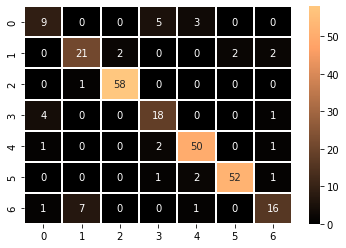

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print('Decision Tree Classifier' + '\n')
print(classification_report(y_test,dtc_pred))
sns.heatmap(confusion_matrix(y_test,dtc_pred),cmap='copper',annot=True,linewidths=2,linecolor='white')

# Voting Classifier

Voting Classifier

              precision    recall  f1-score   support

       BERHI       0.94      0.94      0.94        17
      DEGLET       0.77      0.85      0.81        27
       DOKOL       0.98      1.00      0.99        59
       IRAQI       0.95      0.91      0.93        23
      ROTANA       0.98      1.00      0.99        54
      SAFAVI       0.98      1.00      0.99        56
       SOGAY       0.85      0.68      0.76        25

    accuracy                           0.94       261
   macro avg       0.92      0.91      0.92       261
weighted avg       0.94      0.94      0.94       261



<AxesSubplot:>

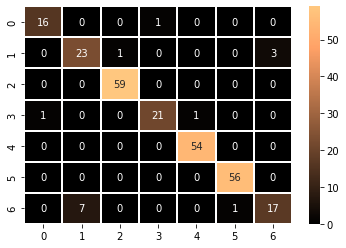

In [31]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
estimators=[('knn', knn), ('sup', sup), ('rfc', rfc), ('logr', logr), ('dtc', dtc)], voting='hard')
voting_clf.fit(X_train,y_train)
vote_pred = voting_clf.predict(X_test)
print('Voting Classifier' + '\n')
print(classification_report(y_test,vote_pred))
sns.heatmap(confusion_matrix(y_test,vote_pred),cmap='copper',annot=True,linewidths=2,linecolor='white')

 # Neural Network